# High Fidelity Noise Tolerant State Preparation of the Kagome Lattice
This is a solution for the quantum state preparation of the Kagome Lattice in a quantum computer for the [Open Science Prize 2022](https://ibmquantumawards.bemyapp.com/#/event). The solution is implemented as a python program (kagome_solution.py) which delegates its work to the Kagome lattice class (kagome_lattice.py). An auxiliary program (kagome_expected.py) is used to calculate the expected ground state of the lattice.

The goal of the program is to find the ground state of the lattice **with the highest fidelity** using the rules described in the open science challenge:
 * It uses the [VQE](https://qiskit.org/textbook/ch-applications/vqe-molecules.html) algorithm outlined in the [Jupyter Notebook](https://github.com/qiskit-community/open-science-prize-2022).
 * It tries to find the ground state with a relative error less than 1%.
 * It uses the quantum processor ibmq_guadalupe.

## Our Solution
The solution is implemented by feeding all the parameters of the VQE algorithm outlined in the Notebook as command line arguments. Thus, the arguments can be classified as follows.

```
$ python kagome_solution.py -h
usage: kagome_solution.py [-h] [-p PROVIDER] [-b RUNBACKEND] [-t TRANSPILE_BACKEND] [-q NUM_QUBITS] [-s SHOTS]
                          [-a {ExcitationPreserving,EfficientSU2,PauliTwoDesign,TwoLocal,RealAmplitudes}]
                          [-o {SPSA,SLSQP,COBYLA,UMDA,GSLS,GradientDescent,L_BFGS_B,NELDER_MEAD,POWELL,NFT}] [-i MAX_ITER]
                          [-ol {1,2,3}] [-ui UNIFORM_INTERACTION] [-up UNIFORM_POTENTIAL] [-r {T-REx,ZNE,PEC}] [-w WEIGHT]
                          [-v {1,2,3,4}]

optional arguments:
  -h, --help            show this help message and exit
  -p PROVIDER, --provider PROVIDER   Hub/Group/Project (default: ibm-q-community/ibmquantumawards/open-science-22)
  -b RUNBACKEND, --runbackend RUNBACKEND
                        Run backend (default: ibmq_guadalupe)
  -t TRANSPILE_BACKEND, --transpile_backend TRANSPILE_BACKEND
                        Transpile backend (default: ibmq_guadalupe)
  -q NUM_QUBITS, --num_qubits NUM_QUBITS
                        Run backend # of qubits (default: 16)
  -s SHOTS, --shots SHOTS
                        Shots (default: 2048)
  -a {ExcitationPreserving,EfficientSU2,PauliTwoDesign,TwoLocal,RealAmplitudes}, --ansatz_type {ExcitationPreserving,EfficientSU2,PauliTwoDesign,TwoLocal,RealAmplitudes}
                        Ansatz type (default: EfficientSU2)
  -o {SPSA,SLSQP,COBYLA,UMDA,GSLS,GradientDescent,L_BFGS_B,NELDER_MEAD,POWELL,NFT}, --optimizer_type {SPSA,SLSQP,COBYLA,UMDA,GSLS,GradientDescent,L_BFGS_B,NELDER_MEAD,POWELL,NFT}
                        Optimizer type (default: NFT)
  -i MAX_ITER, --max_iter MAX_ITER
                        Maximum number of iterations (default: 175)
  -ol {1,2,3}, --opt_level {1,2,3}
                        Optimization level (default: 1)
  -ui UNIFORM_INTERACTION, --uniform_interaction UNIFORM_INTERACTION
                        HeisenbergModel uniform interaction (default: None)
  -up UNIFORM_POTENTIAL, --uniform_potential UNIFORM_POTENTIAL
                        HeisenbergModel uniform potential (default: 0.0)
  -r {T-REx,ZNE,PEC}, --resilience_type {T-REx,ZNE,PEC}
                        Resilience type (default: ZNE)
  -w WEIGHT, --weight WEIGHT
                        Edge weight (default: 1.34)
  -v {1,2,3,4}, --verbosity {1,2,3,4}
                        Verbosity level (default: 2)
```

## Common Arguments

All arguments are optional.

| Name | Description | Default Value |
| --- | --- | --- |
| -h | Display a command line help. | None |
| -p,--provider | Connection provider: Hub/Group/Project. | ibm-q-community/ibmquantumawards/open-science-22 |
| -b,--run\_backend | Quantum processor. | Ibmq\_guadalupe |
| -t, --transpile\_backend | Transpilation backend. | Ibmq\_guadalupe |
| -q, --num\_qubits | Number of qubits of the QPU. | 16 |
| -v,--verbosity | Verbosity level (1-5). | 1 |

## Ansatz Options

These control the behavior of the VQE ansatz. All arguments are optional. Note that we rely on [Qiskit's extensive circuit library](https://qiskit.org/documentation/apidoc/circuit_library.html).

| Name | Description | Default Value |
| --- | --- | --- |
| -a, --ansatz\_type | Ansatz type:<ul><li>ExcitationPreserving</li><li>EfficientSU2</li><li>PauliTwoDesign</li><li>TwoLocal</li><li>RealAmplitudes</li></ul>| EfficientSU2 |

## Optimizer Options

All arguments are optional.

| Name | Description | Default Value |
| --- | --- | --- |
| -o, --optimizer\_type | Optimizer type:<ul><li>SPSA</li><li>SLSQP</li><li>COBYLA</li><li>UMDA</li><li> GSLS</li><li>GradientDescent</li><li>L\_BFGS\_B</li><li>NELDER\_MEAD</li><li>POWELL</li><li>NFT</li></ul>| NFT |
| -i, --max\_iter | Maximum number of iterations or function evals used by the optimizer. | 175 |

## Run time options

Miscellaneous run time options.

| Name | Description | Default Value |
| --- | --- | --- |
| -ol, --opt\_level | Circuit optimization level (1-3) | 1 |
| -ui, --uniform\_interaction | Heisenberg Model uniform interaction value. | Edge weight. |
| -up, --uniform\_potential | Heisenberg Model uniform potential | 0.0 |
| -w, --weight | Lattice edge weight. | 1.34 |
| -s,--shots | Number of execution shots. | 2048 |

## Error Correction Options

| Name | Description | Default Value |
| --- | --- | --- |
| -r, --resilience\_type | Resilience type (1-3):<ul><li>T-Rex: 1</li><li>ZNE: 2</li><li>PEC: 3</li></ul>| 2 |

## Default Arguments

Implementation wise, this is a python program that can be executed from the command line anywhere. By default, the program will execute the VQE algorithm in IBMQ Guadalupe using the following parameters:

- Ansatz: The heuristic excitation-preserving wave function .
  - EfficientSU2 (reps=1, entanglement='reverse_linear')
- Optimizer: Nakanishi-Fujii-Todo algorithm (NFT).
  - NFT (maxiter=175)
- Resilience/Error mitigation: Zero noise extrapolation - ZNE (2).
- Shots: 2048
- Edge weight: 1.34
- Heisenberg Model Uniform Interaction: 1.34
- Heisenberg Model Uniform potential: 0.0

## Solution Files

The following python files are used plus extras.

| Name | Description |
| --- | --- |
| custom_vqe.py | VQE Implementation. This is the heart of the solution.|
| heisenber_model.py | Spin 1/2 model for the Kagome lattice.|
| kagome_expected.py | Calculates the ground state using the classical eigen solver.|
| kagome_lattice.py | Builds the lattice and invokes the VQE.|
| kagome_solution.py | Main entry point to the solution (if run from the command line).|
| solution.ipynb | Notebook entry point to the solution (if run from the browser).|
| doc/ | Documentation folder.|
| plots/ | Result plots from HW experiments.|

# Scalability

The program will run in any quantum processor with any number of qubits. For example to run in Geneva (27 qubits) with an NFT optimizer and uniform potential:
```
$ python3 kagome_solution.py -b ibm_geneva -t ibm_geneva -q 27 -a EfficientSU2 -w 1.0 -o NFT -up -1.0 >> out-geneva.txt &
$ python3 kagome_solution.py -b ibm_cairo -t ibm_cairo -a EfficientSU2 -i 175 -o POWELL -q 27 >> out-cairo.txt &
```
The commands above fire two jobs in the background in different QPUs (No need to wait for hours in a Notebook page, just fire up and go get some coffee). 

# Results

Here is a solution run obtained in ibmq\_guadalupe with an error threshold below 1% (0.05%):

## Solution 1
The following shell runs the solution (in the background) with default parameters in guadaule, taking 1hr run-time and producing a plot PNG named **plot-ibmq_guadalupe-EfficientSU2-NFT-ZNE-s(2048)-w(1.3400)-e[ERROR].png** (The std out will be saved in out-guadalupe.txt)
```
$ python3 kagome_solution.py >> out-guadalupe.txt &
```

<table>
    <tr>
        <td>Backend: ibmq_guadalupe<br/>Ansatz: EfficientSU2 (reps=1, entanglement='reverse_linear')<br/>Optimizer : NFT(maxiter=175)<br/>Resilience : ZNE (2)<br/>Shots: 2048<br/>Edge weight: 1.34</td>
        <td>
            Execution time (s): 12390.63<br/>Expected ground state energy: -18.00000000<br/>Computed ground state energy: -17.99098307<br/>Result eigen value: -17.99098307<br/><b>Relative error: 0.05009404 %</b>
        </td>
    </tr>
</table>

![](plot-ibmq_guadalupe-EfficientSU2-NFT-ZNE-s\(2048\)-w\(1.3400\)-e0.05.png)

## Testing by Notebook
The following code sets the run time args and solves the lattice. It is better to run in the backgroud from the command line as each run may take hours. In this code you can run in:
* Guadalupe with defaults Ansatz: EfficientSU2(reps=1,entanglement='reverse_linear), Optimizer: NFT(maxiter=175), Resilience: ZNE
* Cairo (with 20 iteractions)
* State vector simulator

The run will produce a plot at the end (You will have to wait for a while).
**Note: A run in Guadalupe with defaults should produce an error below 1% as shown in the previous fugure.**

Ground state energy: -18.00
Backend    : ibmq_guadalupe
Ansatz     : EfficientSU2
Optimizer  : NFT Maxiter: 175
Resilience : ZNE shots: 2048 Weight: 1.3400
Optim lev  : 1 uniform_potential: 0.0000
{'group': 'ibmquantumawards',
 'hub': 'ibm-q-community',
 'num_qubits': 16,
 'opt_level': 1,
 'project': 'open-science-22',
 'provider': 'ibm-q-community/ibmquantumawards/open-science-22',
 'qubit_layout': [1, 2, 3, 5, 8, 11, 14, 13, 12, 10, 7, 4],
 'run_backend': 'ibmq_guadalupe',
 'shots': 2048,
 'transpile_backend': 'ibmq_guadalupe',
 'uniform_interaction': 1.34,
 'uniform_potential': 0.0,
 'verbosity': 2}
Execution time (s): 19224.63
{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 175,
    'eigenstate': None,
    'eigenvalue': -17.93602213541667,
    'optimal_circuit': None,
    'optimal_parameters': array([ 3.46210744,  4.49459758,  0.02617099,  4.56821914,  3.10521926,
       -1.37063907,  0.2408801 ,  4.1796661 ,  3.14341203, -1.33256737,
       -0.01067834, -0.0728242

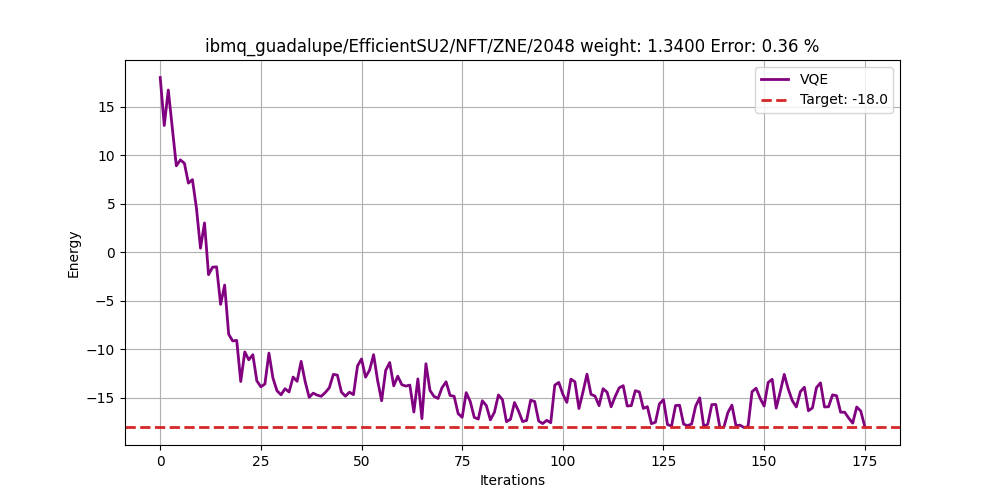

In [1]:
from kagome_expected import get_groud_state
from kagome_lattice import KagomeLattice
import argparse
import matplotlib.pyplot as plt

"""
This is a fragement of the main program (kagome_solution.py) for Review 
Better run the solution from the commabnd line: $ python3 kagome_solution.py
"""
parser  = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)

parser.add_argument('-p', '--provider',      help="Connection provider: Hub/Group/Project"
    ,  default='ibm-q-community/ibmquantumawards/open-science-22')

parser.add_argument('-b', '--runbackend',           help="Run backend",  default='ibmq_guadalupe')
parser.add_argument('-t', '--transpile_backend',    help="Transpile backend",  default='ibmq_guadalupe')

parser.add_argument('-q', '--num_qubits',       type=int, help="Run backend # of qubits",  default=16)
parser.add_argument('-s', '--shots',            type=int, help="Shots",  default=2048)

parser.add_argument('-a', '--ansatz_type',      help="Ansatz type"
    , default='EfficientSU2'
    , choices=['ExcitationPreserving', 'EfficientSU2','PauliTwoDesign','TwoLocal','RealAmplitudes'])
    
parser.add_argument('-o', '--optimizer_type',   help="Optimizer type"
    , default='NFT'
    , choices=['SPSA', 'SLSQP','COBYLA','UMDA','GSLS','GradientDescent','L_BFGS_B','NELDER_MEAD','POWELL','NFT'])
parser.add_argument('-i', '--max_iter',         help="Maximum number of iterations", type=int, default=175)

parser.add_argument('-ol', '--opt_level',           help="Optimization level", type=int, default=1, choices=range(1, 4))
parser.add_argument('-ui', '--uniform_interaction', help="HeisenbergModel uniform interaction", type=float)
parser.add_argument('-up', '--uniform_potential',   help="HeisenbergModel uniform potential", type=float, default=0.0)
    
parser.add_argument('-r', '--resilience_type',  help="Resilience type", default='ZNE', choices=['T-REx','ZNE','PEC'])
parser.add_argument('-w', '--weight',           help="Edge weight", type=float, default=1.34)
parser.add_argument('-v', '--verbosity',        help="Verbosity level", type=int, default=2, choices=range(1,5))

# =============== CHOOSE YOUR RUN ==============
# 1. guadalupe with defaults. This should give error < 1%, runs for 1hr. 
input       = []   

# 2. cairo (27 qubits, with 20 iteractions) OR
#input       = ['-p','ibm-q-ncsu/nc-state/grad-qc-class', '-b','ibm_cairo', '-t','ibm_cairo','-q', '27', '-i', '20']
#input       = ['-b','ibm_cairo', '-t','ibm_cairo','-q', '27', '-i', '20']

# 3. Run in statevector sim w/ 20 iteractions.
#input       = ['-p','ibm-q-ncsu/nc-state/grad-qc-class', '-b','simulator_statevector', '-i', '20']
#input       = ['-b','simulator_statevector', '-i', '20']
#=============== NO NEED TO CHANGE BELOW THIS LINE ==========

args        = parser.parse_args(input)
cn          = args.provider.split("/")     # Connection string hub/group/project

# Expected ground state energy (from classic solver)
gs_energy   = get_groud_state()

print("Ground state energy: %.2f" % gs_energy)

lattice     = KagomeLattice(weight=args.weight, ansatz_type=args.ansatz_type
                , optimizer_type=args.optimizer_type
                , optimizer_maxiter=args.max_iter
                , resilience_type=args.resilience_type)

# Set the expected energy
lattice.expected_energy = gs_energy

run_params  = { 
    'hub'                   : cn[0],    # args.hub,
    'group'                 : cn[1],    # args.group, 
    'project'               : cn[2],    # args.project,
    'provider'              : args.provider,
    'transpile_backend'     : args.transpile_backend,
    'run_backend'           : args.runbackend,
    'num_qubits'            : args.num_qubits,
    'qubit_layout'          : [1, 2, 3, 5, 8, 11, 14, 13, 12, 10, 7, 4],
    'shots'                 : args.shots,
    'opt_level'             : args.opt_level,
    'uniform_interaction'   : args.uniform_interaction if args.uniform_interaction != None else args.weight,
    'uniform_potential'     : args.uniform_potential,
    'verbosity'             : args.verbosity
}

#print (run_params)

# run it
computed_gse, intermediate_info_real_backend = lattice.run(run_params)

def rel_err(target, measured):
    return abs((target - measured) / target)

err_prob    = 100 * rel_err(gs_energy, computed_gse)
    
print(f'Expected ground state energy: {gs_energy:.8f}')
print(f'Computed ground state energy: {computed_gse:.8f}')
print(f'Relative error: {100 * rel_err(gs_energy, computed_gse):.8f} %')

# Let's plot the energy convergence data the callback function acquired.
backend         = args.runbackend
ans_name        = args.ansatz_type
optimizer_name  = args.optimizer_type
resilience      = args.resilience_type
shots           = args.shots
t               = args.weight
plot_name       = "plot-%s-%s-%s-%s-s(%d)-w(%.4f)-e%.2f.png" % (backend, ans_name, optimizer_name, resilience, shots, t, err_prob)
plt.figure(figsize=(10, 5))
plt.plot(intermediate_info_real_backend, color='purple', lw=2, label='VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
plt.title(backend + "/" + ans_name + "/" + optimizer_name + "/" + resilience 
        + "/" + str(shots) + " weight: %.4f Error: %.2f %%" % (t,err_prob))
# Exact ground state energy value
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.savefig(plot_name)


# Error Mitigation and Final Metrics

The following section details the error mitigation techniques applied both at the quantum and classical levels.

## Quantum Error Mitigation yields a low 9% Noise Tolerance Rate
In early HW experiments, we got lucky a few times (with fidelities below 1%). However, due to the noise produced by CX and readout errors, the overall results yielded a low Noise Tolerance (or success rate), even with ZNE resilience.
 * Ansatz: [Zero Noise Extrapolation](https://github.com/Qiskit/qiskit-ibm-runtime/blob/stable/0.9/docs/tutorials/Error-Suppression-and-Error-Mitigation.ipynb) (ZNE)
 * Circuit optimization level = 1

Here is a chart of the success rate with Quantum mitigation only. It is pretty bad, runs failed 91% of the time. **Note: that success means the error threshold falls below 1%.**

| Metric      | Description |
| ----------- | ----------- |
| Total # of Experiments      | 114 |
| # of Failed Experiments      | 104 |
| Avg # of VQE cycles/experiment   | 150 |
| Total # of jobs   | 17K |
| Avg execution time/experiment   | 2h |
| Total Quantum time   | 228h |
| Avg queue wait time   | 4 days  |

![](fig1.png "Success rate with Quantum mitigation")

## Classical Error Mitigation made an astounding difference

The following classic mitigation techniques were applied to the VQE to mitigate error rates.

1. **Rule 1:** If at some stage of the optimization cycle the point falls below the default error threshold (1%), the process is aborted and the optimization returns the collected data.
2. **Rule 2:** If a point falls below the target ground state by some delta = ||x| - |target||, then the uniform interaction (UI) is decreased on the fly (a new Hamiltonian is constructed with this UI and the process continues). This has the effect of moving the curve upwards towards the ground state.
3. **Rule 3:** If point falls above target by delta, do the inverse: Increase the UI & continue. This drives the curve downwards to the target ground state. Note that rule 1 acts as an exit condition for rules 2-4 (i.e. the optimization may abort at any time if the error threshold falls below 1%).
4. **Rule 4:** Recurse at the end. If at the end of the optimization cycle, the point ends above the target, recurse (do it again) from the last point: the optimization will resume towards the ground state. As a failsafe to prevent infinite recursions, a max 5 recursive calls is allowed. If at the end, the ground state is not reached, the experiment fails.

This changed things dramatically, with a final success rate of 97%, **from a total of 37 experiments, only one has failed!**

| Metric      | Description |
| ----------- | ----------- |
| Total # of Experiments      | 37 |
| # of Failed Experiments      | 1 |
| Avg # of VQE cycles/experiment   | 100 |
| Total # of jobs   | 3.7K |
| Avg execution time/experiment   | 1h |
| Total Quantum time   | 37h |
| Avg queue wait time   | 6 days  |

![](fig2.png "Success rate with Quantum/Classic mitigation")

Here is an example of rules 1 and 3 triggered by two experiments. On the left, at optimization cycle 58/100 the X point resulting from the ansatz execution falls below the 1% threshold of the ground state, the cycle terminates and the results are sent back to the client. On the right, the optimization reaches the maximum cycles (100), a recursive call is then triggered with a new Hamiltonian (with a lower uniform interaction). The optimization continues from the last point, however at cycle 110, the point falls below the threshold 1% triggering rule 1 and thus reaching the desired ground state and terminating the optimization cycle.

![](fig3.png "Classic mitigation results")



## Conclusion
The state preparation of the Kagome lattice turned out to be trivial with the help of the extensive circuit library available in Qiskit; and even though the solution runs like a dream in simulation, the results were complete opposites on hardware. In early experiments, we got lucky a few times with high fidelities, but the overall success rate from multiple runs was too low (9%). This forced us to tinker with the VQE code to perform sort of an algorithmic jiu-jitsu. All in all, through an industrious process of trial an error we succeeded on flipping this low success rate into an amazing 97%. **When you run our solution, the probability of landing a high fidelity (less than 1%) is very high!**

## References
1. [Open Science Prize](https://ibmquantumawards.bemyapp.com/#/event) 2022.
2. [Qiskit Circuit Library](https://qiskit.org/documentation/apidoc/circuit_library.html).
3. [Error Supression in Qiskit](https://github.com/Qiskit/qiskit-ibm-runtime/blob/stable/0.9/docs/tutorials/Error-Suppression-and-Error-Mitigation.ipynb).

# Supplemental Materials
Here is a sample of the experimental data collected over a period of 4 months. The choice of Ansatz and optimizer drives the shape of the curve. Note that the number of cycles is important too, as excessive amounts take a long time and may crash, probably due to bugs or memory exceptions on the server side.

<table>
    <tr>
        <td><img src="images/sm1.png"><br/>Processor: 27 qubit Hanoi, run time: ~4h.</td>
        <td><img src="images/sm2.png"><br/>Processor: 27 qubit Hanoi, run time: ~3h.</td>
    </tr>
    <tr>
        <td><img src="images/sm3.png"><br/>Processor: 27 qubit Hanoi, run time: ~2.5h.</td>
        <td><img src="images/sm4.png"><br/>Processor: 27 qubit Cairo, run time: ~2h.</td>
    </tr>
    <tr>
        <td><img src="images/sm5.png"><br/>Processor: 27 qubit Cairo, run time: ~1.5h.</td>
        <td><img src="images/sm6.png"><br/>Processor: 27 qubit Cairo, run time: ~6h.</td>
    </tr>
    <tr>
        <td><img src="images/sm7.png"><br/>Processor: 27 qubit Cairo, run time: ~3h.</td>
        <td><img src="images/sm8.png"><br/>Processor: 27 qubit Geneva, run time: ~1h.</td>
    </tr>
    <tr>
        <td><img src="images/sm9.png"><br/>Processor: 27 qubit Geneva, run time: ~2h.</td>
        <td><img src="images/sm10.png"><br/>A simulator curve, too fast to compare with HW.</td>
    </tr>
</table>

Legend - Optimizer

 * GSLS: Gaussian-smoothed Line Search.
 * SPSA: Simultaneous Perturbation Stochastic Approximation.
 * COBYLA: Constrained Optimization by Linear Approximation.
 * POWELL: The Powell algorithm performs unconstrained optimization.
 * UMDA: Univariate Marginal Distribution Algorithm.
 * QNSPSA: Quantum Natural SPSA.

Legend – Resilience

 * ZNE: Zero Noise Extrapolation.
 * T-Rex: Twirled readout error extinction.
